<img src="../holberton_logo.png" alt="logo" width="500"/>

# Time Series Forecasting

Bitcoin (BTC) became a trending topic after its price peaked in 2018. Many have sought to predict its value in order to accrue wealth. Let’s attempt to use our knowledge of RNNs to attempt just that.


Given the `coinbase` and `bitstamp` datasets, write a script, `forecast_btc.py`, that creates, trains, and validates a keras model for the forecasting of BTC:


- Your model should use the past 24 hours of BTC data to predict the value of BTC at the close of the following hour (approximately how long the average transaction takes):


- The datasets are formatted such that every row represents a 60 second time window containing:
    - The `start time` of the time window in Unix time
    - The `open price` in USD at the start of the time window
    - The `high price` in USD within the time window
    - The `low price` in USD within the time window
    - The `close price` in USD at end of the time window
    - The `amount of BTC transacted` in the time window
    - The `amount of Currency` (USD) transacted in the time window
    - The `volume-weighted average price` in USD for the time window


- Your model should use an RNN architecture of your choosing


- Your model should use mean-squared error (MSE) as its cost function


- You should use a tf.data.Dataset to feed data to your model

### Are all of the data points useful?

Generally, it **depends on the specific context and the goal of the analysis**. 


In the given context, **all data points are used initially, but then missing values are dropped**. 


*Dropping missing values may lead to a loss of some data points, but it ensures that the remaining data points are complete and do not introduce bias in the analysis*. 

The usefulness of the data points should be evaluated based on the specific requirements and the quality of the data.


### Are all of the data features useful?


Similarly, in general, **the usefulness of the data features depends on the specific analysis** and the goal of predicting the value of Bitcoin. In our context, the `Timestamp` column is used for indexing, while the `Close` column is used as the main predictor and for visualization. 

The other columns (`Open`, `High`, `Low`, `Volume_(BTC)`, `Volume_(Currency)`, `Weighted_Price`) are not explicitly used. 



### Should you rescale the data?


Yes, **rescaling the data is important, especially when using  machine learning models or algorithms**. 


*Rescaling helps normalize the data and bring all features to a similar scale, preventing certain features from dominating the analysis due to their larger magnitude*. 


In our context, the data will be normalized based on the mean and standard deviation of the training data. This ensures that all data points are rescaled consistently and allows for fair comparisons and meaningful analysis.


### Is the current time window relevant?

In our context, the time window of `70%` for training, `20%` for validation, and `10%` for testing is used. 


This choice is based on the available data, common practice, and the objective of predicting the value of Bitcoin. 


However, the optimal time window may vary depending on factors such as the volatility and frequency of price changes in the Bitcoin market. Adjustments to the time window can be explored and evaluated to improve the accuracy of the forecasting model.


### How should you save this preprocessed data?

In our context, the preprocessed data is returned as three separate DataFrames: `train_data`, `valid_data`, and `test_data`. These DataFrames can be saved as separate CSV files

```Python
train_data.to_csv('train_data.csv', index=False)
valid_data.to_csv('valid_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
```

This allows us to save the preprocessed data in a structured format that can be easily loaded and used for subsequent modeling or analysis tasks.

## A Sample Implementation

In [1]:
#!/usr/bin/env python3
"""
Preprocesses data used to train and predict the value of Bitcoin
"""

import pandas as pd
import matplotlib.pyplot as plt


def preprocess_data():
    """
    Preprocesses the data used to train and predict the value of Bitcoin.

    Returns:
        tuple: A tuple containing the preprocessed training, validation, and testing data.
    """
    
    # Read the Bitcoin data from a CSV file
    data = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

    # Remove missing values
    data = data.dropna()

    # Split the data for training (70%), validation (20%), and testing (10%)
    data_length = len(data)
    train_data  = data[0:int(data_length * 0.7)]
    valid_data  = data[int(data_length * 0.7):int(data_length * 0.9)]
    test_data   = data[int(data_length * 0.9):]

    # Normalize the data based on training data
    train_mean = train_data.mean()
    train_std = train_data.std()
    train_data = (train_data - train_mean) / train_std
    valid_data = (valid_data - train_mean) / train_std
    test_data = (test_data - train_mean) / train_std

    # Generate a plot to visualize the data
    plot_features = data['Close']
    plot_features.index = data['Timestamp']
    plot_features.plot(subplots=True)

    # Generate another plot to visualize the processed data
    plot_features = data['Close']
    plot_features.index = data['Timestamp']
    plt.plot(plot_features.index, plot_features, 'r--', label='Processed')
    plt.xlabel('Time')
    plt.ylabel('Bitcoin Close Value')
    plt.title("Preprocessed Bitcoin Data")
    plt.legend()
    plt.show()

    return train_data, valid_data, test_data


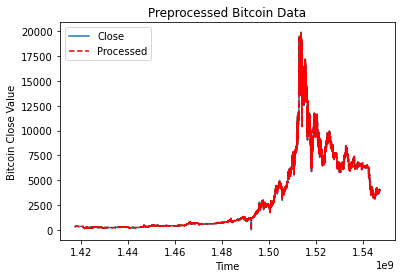

(         Timestamp      Open      High       Low     Close  Volume_(BTC)  \
 0        -1.959813 -0.594395 -0.594450 -0.594326 -0.594397     -0.420441   
 7        -1.959796 -0.594395 -0.594450 -0.594326 -0.594397     -0.420441   
 51       -1.959693 -0.547184 -0.547257 -0.547094 -0.547185     -0.420441   
 77       -1.959632 -0.547184 -0.547257 -0.547094 -0.547185     -0.419404   
 1436     -1.956445 -0.542463 -0.542538 -0.542371 -0.542464     -0.420441   
 ...            ...       ...       ...       ...       ...           ...   
 1500467   1.695717  4.497716  4.495689  4.500007  4.497707     -0.037666   
 1500468   1.695720  4.497716  4.495689  4.500014  4.497707     -0.301579   
 1500469   1.695722  4.497716  4.495689  4.500001  4.497694      0.324191   
 1500470   1.695724  4.497702  4.495682  4.480075  4.487651      1.856946   
 1500471   1.695727  4.487653  4.485637  4.485588  4.487294     -0.044285   
 
          Volume_(Currency)  Weighted_Price  
 0                -0.269688 

In [2]:
preprocess_data()

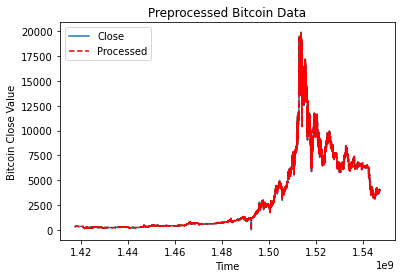

Epoch 1/20
43546/43546 [==============================] - 816s 19ms/step - loss: 5.8707e-04 - mean_absolute_error: 0.0044 - val_loss: 2.7968 - val_mean_absolute_error: 0.8370
Epoch 2/20
43546/43546 [==============================] - 776s 18ms/step - loss: 2.1209e-05 - mean_absolute_error: 0.0022 - val_loss: 3.0759 - val_mean_absolute_error: 0.8601
Epoch 3/20
1/1 [==============================] - 1s 566ms/step


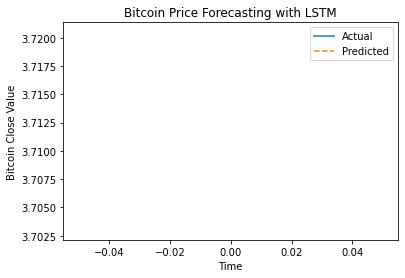

In [4]:
#!/usr/bin/env python3
"""
Creates and trains a model to predict the value of Bitcoin
"""
import numpy as np
import pandas as pd
import tensorflow as tf


class WindowGenerator():
    """
    Create windows of consecutive data samples. 
    Windows are used to find trends within the data to make predictions. 
     - input_width: number of consecutive input time steps to use for each sample
     - label_width: number of time steps in the future to predict
     - shift: number of time steps between consecutive inputs      
    """
    def __init__(self, input_width, label_width, shift,
                 train_data, valid_data, test_data, label_columns=None):
        # set attributes with raw data
        self.train_data = train_data
        self.valid_data = valid_data
        self.test_data = test_data

        # label column indices
        self.label_columns = label_columns
        
        # dictionary that maps each column name to its corresponding index
        if label_columns is not None:
            self.label_columns_indices = {
                name: i for i, name in enumerate(label_columns)}
        # maps each column name to its corresponding index
        # easier for tensorflow to access by index
        self.column_indices = {
            name: i for i, name in enumerate(train_data.columns)}

        # window parameters
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        # the number of consecutive input time steps and horizon
        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        # generates an array of indices for the input window 
        self.input_indices = np.arange(
            self.total_window_size)[self.input_slice]

        # starting index for the label window within the total window size
        self.label_start   = self.total_window_size - self.label_width
        # a slice object representing the range of indices for the label window to the end
        self.labels_slice  = slice(self.label_start, None)
        # generates an array of indices corresponding to the label window
        self.label_indices = np.arange(
            self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        """
        Converts list of consecutive inputs into window of inputs and
            window of labels
        """
        # extract the input and label windows from the provided features array, 
        # which represents a batch of consecutive input data.
        # The shape of this array is (batch_size, time_steps, num_features)
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        
        if self.label_columns is not None:
            # construct a new tensor 
            # selecting all rows, and all time steps, then the
            # corresponding index of the desired label column
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for
                 name in self.label_columns], axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        # allowing the tensors to accommodate varying batch sizes during training and evaluation
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        """
        Converts time series DataFrame into tf.data.Dataset
        """
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        """
        Sets property to get tf.data.Dataset for training data
        """
        return self.make_dataset(self.train_data)

    @property
    def val(self):
        """
        Sets property to get tf.data.Dataset for validation data
        """
        return self.make_dataset(self.valid_data)

    @property
    def test(self):
        """
        Sets property to get tf.data.Dataset for testing data
        """
        return self.make_dataset(self.test_data)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result


def compile_and_fit(model, window, patience=2, epochs=20):
    """
    Compiles and fits the model to return history
    """
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history


def time_series_forecasting(train, valid, test):
    """
    Creates and trains a model to predict the value of Bitcoin

    parameters:
        train: preprocessed training dataset
        valid: preprocessed validation dataset
        test: preprocessed testing dataset
    """
    window = WindowGenerator(input_width=24, label_width=1, shift=1,
                             train_data=train, valid_data=valid,
                             test_data=test, label_columns=['Close'])

    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(24, return_sequences=False),
        tf.keras.layers.Dense(units=1)
    ])

    history = compile_and_fit(lstm_model, window)

    # Make predictions on the test dataset
    test_performance = {}
    test_performance['LSTM'] = lstm_model.evaluate(window.test)

    # Get the example batch from the test dataset for predictions
    inputs, targets = next(iter(window.test))

    # Make predictions using the trained model
    predictions = lstm_model.predict(inputs)

    # Plot the actual values and the predicted values
    plt.plot(np.arange(len(targets[0])), targets[0], label='Actual')
    plt.plot(np.arange(len(predictions[0])), predictions[0], label='Predicted', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Bitcoin Close Value')
    plt.title('Bitcoin Price Forecasting with LSTM')
    plt.legend()
    plt.show()

    return test_performance

if __name__ == '__main__':
    train_data, valid_data, test_data = preprocess_data()
    test_performance = time_series_forecasting(train_data, valid_data, test_data)
